# Homework 1 : CUAHSI VU : Snow Hydrology

This notebook will be relatively short because this where the real work starts and most of the notebook will be written by you (or at least that is the plan). We'll do three exercises in homework 1:

* Homework 1 exercise 1: Change the snow layering scheme

* Homework 1 exercise 2: Change the albedo formulation and albedo parameters

* Homework 1 exercise 3: Change the parameters controlling drainage through the snow pack

We'll use the setup from the `homework_1_C_setup.ipynb` notebook for all three exercises.

As before, remember that you want to save your notebooks in a place other than the `examples` directory tree, because files you save there may be deleted and overwritten the next time you start your virtual machine. Save your files somewhere in the `work` directory tree: `work/homework_1` would be a great place for them. So click on "_File --> Save Notebook As..._" and save this notebook as `work/homework_1/homework_1_D_exercise_1.ipynb` before you continue. If things go hopelessly wrong, you can always start over again with the original notebook in your `examples` directory tree.

***
***
## D. Homework 1 Exercise 1

### Setup

We'll import some of the python modules that you are likely to need right up front. Note that you only need to do this once in a notebook. As long as you are working in the same session, the modules will remain loaded for the duration of that session.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt # if you want to do some plotting using matplotlib (optional)
from pysumma.Simulation import Simulation # create Simulation objects
from pysumma.hydroshare import hydroshare # create hydroshare objects to upload to HydroShare
from pysumma.LocalParamInfo import LocalParamInfo # modify local parameters. Explained below

import numpy as np

We'll also set some variables to make sure that everyone is using the same setup. This uses the setup that you installed in the `homework_1_C_setup.ipynb` notebook.

In [2]:
resource_id = '363296896e9d48d9b464d766fcd3073a'
case_path = '/home/jovyan/work/{}/{}/data/contents/reynolds'.format(resource_id, resource_id)
filemanager_path = case_path+'/settings/snow_fileManager_template.txt'
summa_code_path = '/opt/summa'

***
### Change the snow layering scheme

Snow models represent a snow pack as one or more layers of snow and keep track of how much water is stored in each layer (snow water equivalent or SWE) as well as other state variables such as temperature. The model then tracks the time evolution of these state variables in each layer as well as the fluxes of water and energy between the layers.

In SUMMA you can choose between two different methods to combine and sub-divide snow layers. This behavior is controlled by the `snowLayers` variable in the [SUMMA decisions file](https://summa.readthedocs.io/en/latest/input_output/SUMMA_input/#infile_model_decisions) and can take one of two values, either `CLM_2010` or `jrdn1991`. The first refers to how snow layers were handled in the Community Land Model (CLM), while the second refers the snow layering scheme in SNTHERM as describe in  Jordan (1991).

Among others things, the `CLM_2010` only has a limited number of snow layers. The layers store a maximum amount of SWE and when SWE in a layer exceeds that value, a new layer is created. Similarly, when SWE in a layer falls below a minimum SWE, the layer is merged with a neighboring layer. Once the maximum number of layers has been created, the deepest layer can grow as deep as it needs to be and acts as snow reservoir with unlimited capacity. The `jrdn1991` scheme on the other hand keeps creating additional layers as the snow pack grows in depth.

Here we will do four different simulations:

* SUMMA with `CLM_2010`
* SUMMA with `jrdn1991`
* SUMMA with `CLM_2010`, but we will configure it to act as a two layer model (the default version uses five snow layers)
* SUMMA with `CLM_2010`, a two layer model and a thick top layer.

So now it is up to you. Just to refresh your memory we'll show you how to get started and then will provide some hints along the way.

***
#### __SUMMA with CLM_2010__ (5 layers)

Create a simulation object. The path for the SUMMA code and the file manager (the SUMMA input file with information about all the other input files) are already defined above. We can use the same file manager file (and thus the same simulation object) for all the runs, just keep track of what you did. We also already imported the `Simulation()` method.

In [3]:
S = Simulation(case_data=filemanager_path, summa_code=summa_code_path)

ModelOuput master file filepath: /opt/summa/build/source/dshare/var_lookup.f90


Set the decision for `snowLayers` to `CLM_2010`.

In [4]:
S.decision_obj.snowLayers.options

['CLM_2010', 'jrdn1991']

In [5]:
S.decision_obj.snowLayers.value = 'CLM_2010'

Use a `run_suffix` that uniquely identifies this run so that you can keep your runs apart, for example `CLM_2010`, and run the model. If you assign the results to its own dataset (e.g. `ds_clm_2010`) and output file (e.g. `file_clm_2010`) it will be easier to gather all the files and upload them to HydroShare (or you can do so one by one, this is all up to you). The run itself will take about a minute.

In [6]:
ds_clm_2010, file_clm_2010 = S.execute(run_suffix='CLM_2010_5', run_option='local')

file_suffix is 'CLM_2010_5'.
file_master is '/home/jovyan/work/363296896e9d48d9b464d766fcd3073a/363296896e9d48d9b464d766fcd3073a/data/contents/reynolds/settings/snow_fileManager_template.txt'.
start at 17:16:59
Name of Model Output control file: /home/jovyan/work/363296896e9d48d9b464d766fcd3073a/363296896e9d48d9b464d766fcd3073a/data/contents/reynolds/settings/snow_zOutputControl.txt
decisions file =  /home/jovyan/work/363296896e9d48d9b464d766fcd3073a/363296896e9d48d9b464d766fcd3073a/data/contents/reynolds/settings/snow_zDecisions.txt
   1 simulStart: 1999-07-01 00:00
   2 simulFinsh: 2003-09-30 23:00
   3 soilCatTbl: ROSETTA
   4 vegeParTbl: USGS
   5 soilStress: NoahType
   6 stomResist: BallBerry
   7 num_method: itertive
   8 fDerivMeth: analytic
   9 LAI_method: monTable
  10 f_Richards: mixdform
  11 groundwatr: noXplict
  12 hc_profile: constant
  13 bcUpprTdyn: nrg_flux
  14 bcLowrTdyn: zeroFlux
  15 bcUpprSoiH: liq_flux
  16 bcLowrSoiH: drainage
  17 veg_traits: CM_QJRMS1988
  

You can quickly check how the number of snow layers changes by plotting

Max Snow Layers: 5


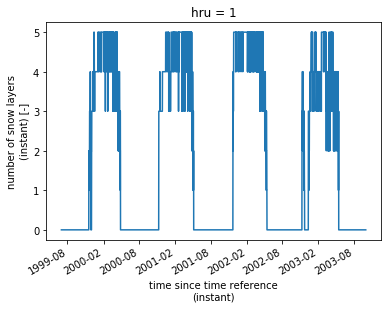

In [7]:
ds_clm_2010.nSnow.isel(hru=0).plot()

print("Max Snow Layers: %d" % int(ds_clm_2010.nSnow.isel(hru=0).max()))

As you can see, the number of layers never exceeds five.

***
#### __SUMMA with jrdn1991__ (~100 layers)

Repeat the exercise with the `jrdn1991` option for `snowLayers`. Examine the differences in the snow layers themselves, but also in other characteristics of snow pack evolution. In SUMMA, all other options will be the same between these two simulations unless you change things explicitly.

ModelOuput master file filepath: /opt/summa/build/source/dshare/var_lookup.f90
file_suffix is 'jrdn1991_100'.
file_master is '/home/jovyan/work/363296896e9d48d9b464d766fcd3073a/363296896e9d48d9b464d766fcd3073a/data/contents/reynolds/settings/snow_fileManager_template.txt'.
start at 17:19:58
Name of Model Output control file: /home/jovyan/work/363296896e9d48d9b464d766fcd3073a/363296896e9d48d9b464d766fcd3073a/data/contents/reynolds/settings/snow_zOutputControl.txt
decisions file =  /home/jovyan/work/363296896e9d48d9b464d766fcd3073a/363296896e9d48d9b464d766fcd3073a/data/contents/reynolds/settings/snow_zDecisions.txt
   1 simulStart: 1999-07-01 00:00
   2 simulFinsh: 2003-09-30 23:00
   3 soilCatTbl: ROSETTA
   4 vegeParTbl: USGS
   5 soilStress: NoahType
   6 stomResist: BallBerry
   7 num_method: itertive
   8 fDerivMeth: analytic
   9 LAI_method: monTable
  10 f_Richards: mixdform
  11 groundwatr: noXplict
  12 hc_profile: constant
  13 bcUpprTdyn: nrg_flux
  14 bcLowrTdyn: zeroFlux
  1

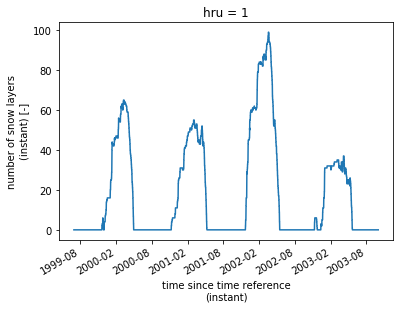

In [8]:
# Create simulation object
S = Simulation(case_data=filemanager_path, summa_code=summa_code_path)

# Set snow layer scheme to 'jrdn1991'
S.decision_obj.snowLayers.value = 'jrdn1991'

# Execute the model
ds_jrdn1991, file_jrdn1991 = S.execute(run_suffix='jrdn1991_100', run_option='local')

# See how many snow layers we have
ds_jrdn1991.nSnow.isel(hru=0).plot()
print("Max Snow Layers: %d" % int(ds_jrdn1991.nSnow.isel(hru=0).max()))

***
#### __SUMMA with CLM_2010 configured as a  two layer model__ (2 layer, thin top layer)

Now change the `snowLayers` option back to `CLM_2010` and configure the model to act as a two layer snow model rather than a five layer snow model. Two layer models are quite common. The surface layer is typically quite thin in these setups to respond quickly to changing atmospheric conditions, while the second layer acts as a snow reservoir with unlimited capacity.

To configure the snow model as a two layer model, we need to change some model parameters, something we have not done so far, so we need to introduce another function in pySUMMA. Here, we'll change some settings in the SUMMA input file that contains parameter information (the name of that file is stored in your simulation object as `S.local_par.filename`).


In [9]:
S.local_par.filename

'snow_zLocalParamInfo.txt'

We are going to change the file so it has the following settings:
```
zminLayer3                |     100.0000 |       0.0500 |       0.0500
zminLayer4                |     100.0000 |       0.1000 |       0.1000
zminLayer5                |     100.0000 |       0.2500 |       0.2500
zmaxLayer2_lower          |    1000.0000 |       0.2000 |       0.2000
zmaxLayer3_lower          |    1000.0000 |       0.5000 |       0.5000
zmaxLayer4_lower          |    1000.0000 |       1.0000 |       1.0000
zmaxLayer2_upper          |    1000.0000 |       0.1500 |       0.1500
zmaxLayer3_upper          |    1000.0000 |       0.3000 |       0.3000
zmaxLayer4_upper          |    1000.0000 |       0.7500 |       0.7500
```
For now don't worry about the last two columns (they are not used). The value in the second column determines when a new snow layer is created or when two layers are merged. By creating a second layer with a very large capacity, layers 3, 4, and 5 will never be created and the model acts like a two layer snow model.

While you can make these changes directly in the text file (`S.local_par.filename`), we will use pySUMMA to do so. This works somewhat differently than for the decisions (pySUMMA is a work in progress), but you can do the following:

In [10]:
S.decision_obj.snowLayers.value = 'CLM_2010'

local_params_file = S.file_dir + '/' + S.local_par.filename
local_params = LocalParamInfo(local_params_file)

local_params.replace('zminLayer3', 100.0000, 0.0500, 0.0500)
local_params.replace('zminLayer4', 100.0000, 0.1000, 0.1000)
local_params.replace('zminLayer5', 100.0000, 0.2500, 0.2500)
local_params.replace('zmaxLayer2_lower', 1000.0000, 0.2, 0.2000)
local_params.replace('zmaxLayer3_lower', 1000.0000, 0.5000, 0.5000)
local_params.replace('zmaxLayer4_lower', 1000.0000, 1.0000, 1.0000)
local_params.replace('zmaxLayer2_upper', 1000.0000, 0.1500, 0.1500)
local_params.replace('zmaxLayer3_upper', 1000.0000, 0.3000, 0.3000)
local_params.replace('zmaxLayer4_upper', 1000.0000, 0.7500, 0.7500)

Now go ahead and run the model. After you run the model, it is a good idea to restore the original parameters, which you can do by executing `local_params.restore()`. Note that this will only restore the immediately previous set of parameters. If things go really wrong, you can rerun the setup notebook (`work/homework_1/homework_1_C_setup.ipynb`) and start with a clean slate.

file_suffix is 'CLM_2010_2thin'.
file_master is '/home/jovyan/work/363296896e9d48d9b464d766fcd3073a/363296896e9d48d9b464d766fcd3073a/data/contents/reynolds/settings/snow_fileManager_template.txt'.
start at 17:22:18
Name of Model Output control file: /home/jovyan/work/363296896e9d48d9b464d766fcd3073a/363296896e9d48d9b464d766fcd3073a/data/contents/reynolds/settings/snow_zOutputControl.txt
decisions file =  /home/jovyan/work/363296896e9d48d9b464d766fcd3073a/363296896e9d48d9b464d766fcd3073a/data/contents/reynolds/settings/snow_zDecisions.txt
   1 simulStart: 1999-07-01 00:00
   2 simulFinsh: 2003-09-30 23:00
   3 soilCatTbl: ROSETTA
   4 vegeParTbl: USGS
   5 soilStress: NoahType
   6 stomResist: BallBerry
   7 num_method: itertive
   8 fDerivMeth: analytic
   9 LAI_method: monTable
  10 f_Richards: mixdform
  11 groundwatr: noXplict
  12 hc_profile: constant
  13 bcUpprTdyn: nrg_flux
  14 bcLowrTdyn: zeroFlux
  15 bcUpprSoiH: liq_flux
  16 bcLowrSoiH: drainage
  17 veg_traits: CM_QJRMS198

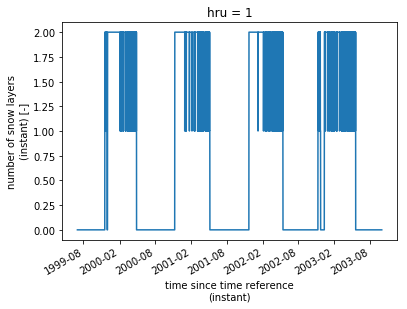

In [11]:
# Execute the model
ds_clm_2010_2thin, file_clm_2010_2thin = S.execute(run_suffix='CLM_2010_2thin', run_option='local')

# See how many snow layers we have
ds_clm_2010_2thin.nSnow.isel(hru=0).plot()
print("Max Snow Layers: %d" % int(ds_clm_2010_2thin.nSnow.isel(hru=0).max()))

Before you go on, verify that your model run only uses two snow layers and restore the original parameters by executing `local_params.restore()`.

In [12]:
local_params.restore()

***
#### __SUMMA with CLM_2010 configured as a two layer model__ (2 layer, thick top layer)

One more run with `CLM_2010`, two layers, and a thick top layer. To do this, change the local parameters to
```
zminLayer1                |       0.0500 |       0.0500 |       0.0500
zminLayer2                |       0.0200 |       0.0500 |       0.0500
zminLayer3                |     100.0000 |       0.0500 |       0.0500
zminLayer4                |     100.0000 |       0.1000 |       0.1000
zminLayer5                |     100.0000 |       0.2500 |       0.2500
zmaxLayer1_lower          |       0.2000 |       0.0500 |       0.0500
zmaxLayer2_lower          |    1000.0000 |       0.2000 |       0.2000
zmaxLayer3_lower          |    1000.0000 |       0.5000 |       0.5000
zmaxLayer4_lower          |    1000.0000 |       1.0000 |       1.0000
zmaxLayer1_upper          |       0.1500 |       0.0300 |       0.0300
zmaxLayer2_upper          |    1000.0000 |       0.1500 |       0.1500
zmaxLayer3_upper          |    1000.0000 |       0.3000 |       0.3000
zmaxLayer4_upper          |    1000.0000 |       0.7500 |       0.7500

```

and run again. After you are done, restore the local parameters to the original values, because we will use the same setup in the next notebook.

file_suffix is 'CLM_2010_2thick'.
file_master is '/home/jovyan/work/363296896e9d48d9b464d766fcd3073a/363296896e9d48d9b464d766fcd3073a/data/contents/reynolds/settings/snow_fileManager_template.txt'.
start at 17:26:09
Name of Model Output control file: /home/jovyan/work/363296896e9d48d9b464d766fcd3073a/363296896e9d48d9b464d766fcd3073a/data/contents/reynolds/settings/snow_zOutputControl.txt
decisions file =  /home/jovyan/work/363296896e9d48d9b464d766fcd3073a/363296896e9d48d9b464d766fcd3073a/data/contents/reynolds/settings/snow_zDecisions.txt
   1 simulStart: 1999-07-01 00:00
   2 simulFinsh: 2003-09-30 23:00
   3 soilCatTbl: ROSETTA
   4 vegeParTbl: USGS
   5 soilStress: NoahType
   6 stomResist: BallBerry
   7 num_method: itertive
   8 fDerivMeth: analytic
   9 LAI_method: monTable
  10 f_Richards: mixdform
  11 groundwatr: noXplict
  12 hc_profile: constant
  13 bcUpprTdyn: nrg_flux
  14 bcLowrTdyn: zeroFlux
  15 bcUpprSoiH: liq_flux
  16 bcLowrSoiH: drainage
  17 veg_traits: CM_QJRMS19

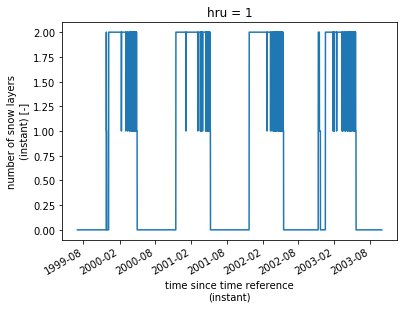

In [13]:
S.decision_obj.snowLayers.value = 'CLM_2010'

# Change local parameters for layer thickness
local_params_file = S.file_dir + '/' + S.local_par.filename
local_params = LocalParamInfo(local_params_file)

local_params.replace('zminLayer1',           0.0500,  0.0500,  0.0500)
local_params.replace('zminLayer2',           0.0200,  0.0500,  0.0500)
local_params.replace('zminLayer3',         100.0000,  0.0500,  0.0500)
local_params.replace('zminLayer4',         100.0000,  0.1000,  0.1000)
local_params.replace('zminLayer5',         100.0000,  0.2500,  0.2500)
local_params.replace('zmaxLayer1_lower',     0.2000,  0.0500,  0.0500)
local_params.replace('zmaxLayer2_lower',  1000.0000,  0.2000,  0.2000)
local_params.replace('zmaxLayer3_lower',  1000.0000,  0.5000,  0.5000)
local_params.replace('zmaxLayer4_lower',  1000.0000,  1.0000,  1.0000)
local_params.replace('zmaxLayer1_upper',     0.1500,  0.0300,  0.0300)
local_params.replace('zmaxLayer2_upper',  1000.0000,  0.1500,  0.1500)
local_params.replace('zmaxLayer3_upper',  1000.0000,  0.3000,  0.3000)
local_params.replace('zmaxLayer4_upper',  1000.0000,  0.7500,  0.7500)

# Execute the model
ds_clm_2010_2thick, file_clm_2010_2thick = S.execute(run_suffix='CLM_2010_2thick', run_option='local')

# See how many snow layers we have
ds_clm_2010_2thick.nSnow.isel(hru=0).plot()
print("Max Snow Layers: %d" % int(ds_clm_2010_2thick.nSnow.isel(hru=0).max()))

In [14]:
local_params.restore()

***
***
## Analysis:

__1A:__ How does the number of layers impact modeled snow water equivalent evolution? Are there certain times of year (or times of the snowmelt cycle) that are more sensitive than others?

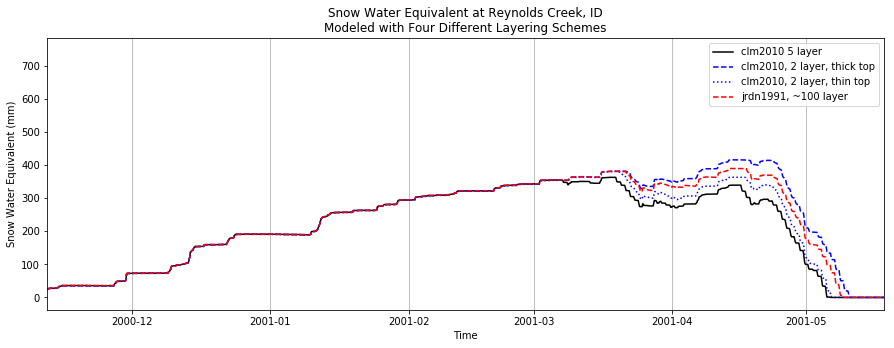

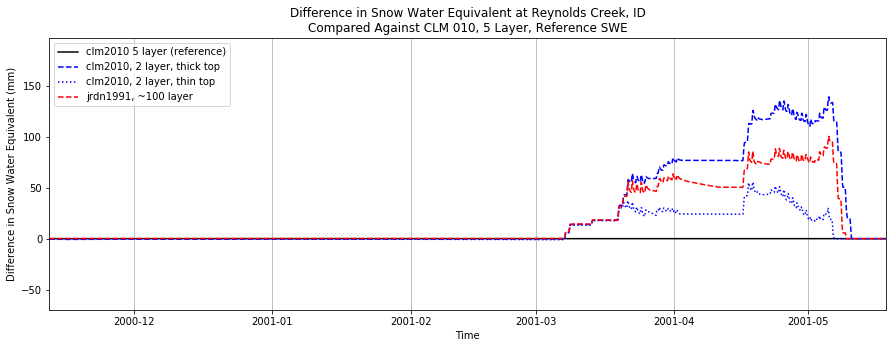

In [47]:
# Retrieve SWE from each model scenario:
clm2010_5layer_SWE = ds_clm_2010.scalarSWE.isel(hru=0)
jrdn1991_100layer_SWE = ds_jrdn1991.scalarSWE.isel(hru=0)
clm2010_2layer_thick_SWE = ds_clm_2010_2thick.scalarSWE.isel(hru=0)
clm2010_2layer_thin_SWE = ds_clm_2010_2thin.scalarSWE.isel(hru=0)

# scalarSWE in kg m-2 and for nominal water density of 1000 kg m-3:
# SWE (kg m-2) / 1000 (kg m-3) * 1000 (mm/m) = SWE (mm)

# Set start and end indices for plotting different time periods
start = 12000; end = 16500; #

# Plot SWE over time:
plt.figure(figsize=(15,5))
plt.title("Snow Water Equivalent at Reynolds Creek, ID\nModeled with Four Different Layering Schemes")
plt.plot(ds_clm_2010.scalarSWE.time,clm2010_5layer_SWE,'-k',label="clm2010 5 layer")
plt.plot(ds_clm_2010_2thick.scalarSWE.time,clm2010_2layer_thick_SWE,'--b',label="clm2010, 2 layer, thick top")
plt.plot(ds_clm_2010_2thin.scalarSWE.time,clm2010_2layer_thin_SWE,':b',label="clm2010, 2 layer, thin top")
plt.plot(ds_jrdn1991.scalarSWE.time,jrdn1991_100layer_SWE,'--r',label="jrdn1991, ~100 layer")
ax = plt.gca(); ax.xaxis.grid(True)
plt.legend()
plt.xlabel("Time");
plt.ylabel("Snow Water Equivalent (mm)");
plt.xlim(((ds_clm_2010.time.data[start],ds_clm_2010.time.data[end])));

# Plot deltaSWE over time:
plt.figure(figsize=(15,5))
plt.title("Difference in Snow Water Equivalent at Reynolds Creek, ID\nCompared Against CLM 010, 5 Layer, Reference SWE")
plt.plot(ds_clm_2010.scalarSWE.time,clm2010_5layer_SWE-clm2010_5layer_SWE,'-k',label="clm2010 5 layer (reference)")
plt.plot(ds_clm_2010_2thick.scalarSWE.time,clm2010_2layer_thick_SWE-clm2010_5layer_SWE,'--b',label="clm2010, 2 layer, thick top")
plt.plot(ds_clm_2010_2thin.scalarSWE.time,clm2010_2layer_thin_SWE-clm2010_5layer_SWE,':b',label="clm2010, 2 layer, thin top")
plt.plot(ds_jrdn1991.scalarSWE.time,jrdn1991_100layer_SWE-clm2010_5layer_SWE,'--r',label="jrdn1991, ~100 layer")
ax = plt.gca(); ax.xaxis.grid(True)
plt.legend()
plt.xlabel("Time");
plt.ylabel("Difference in Snow Water Equivalent (mm)");
plt.xlim(((ds_clm_2010.time.data[start],ds_clm_2010.time.data[end])));

__1B:__ How does the number of layers impact modeled snow density (snow depth divided by snow water equivalent)? Are there certain times of year (or times of the snowmelt cycle) that are more sensitive than others?

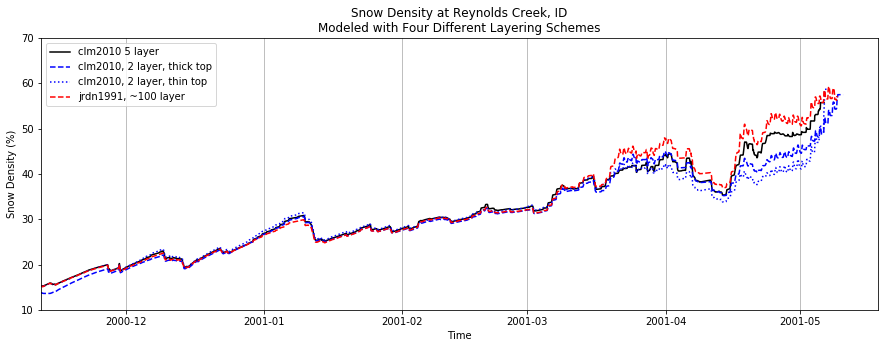

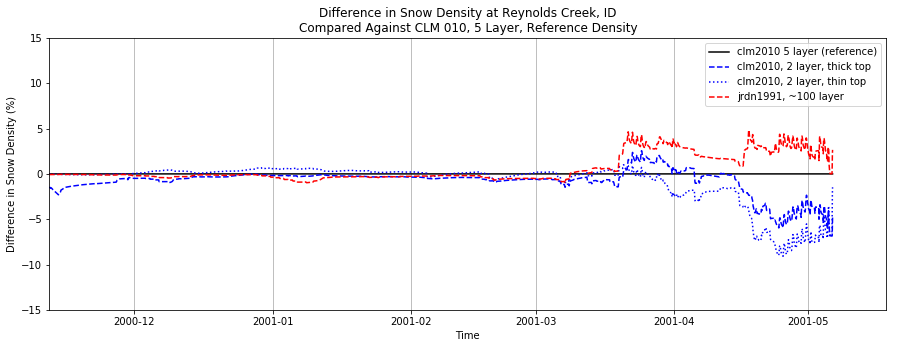

In [46]:
# Retrieve snow density from SWE and snow depth from each model scenario:
clm2010_5layer_Density = 100 * (clm2010_5layer_SWE/1000) / ds_clm_2010.scalarSnowDepth.isel(hru=0)
jrdn1991_100layer_Density =  100 * (jrdn1991_100layer_SWE/1000) / ds_jrdn1991.scalarSnowDepth.isel(hru=0)
clm2010_2layer_thick_Density = 100 * (clm2010_2layer_thick_SWE/1000) / ds_clm_2010_2thick.scalarSnowDepth.isel(hru=0)
clm2010_2layer_thin_Density = 100 * (clm2010_2layer_thin_SWE/1000) / ds_clm_2010_2thin.scalarSnowDepth.isel(hru=0)

# scalarSnowDepth in m and with SWE from cell above (convert from mm to m):
# snowDensity (%) = SWE (m) / snowDepth (m)

# Set start and end indices for plotting different time periods
start = 12000; end = 16500; #

# Plot snow density over time:
plt.figure(figsize=(15,5))
plt.title("Snow Density at Reynolds Creek, ID\nModeled with Four Different Layering Schemes")
plt.plot(ds_clm_2010.scalarSnowDepth.time,clm2010_5layer_Density,'-k',label="clm2010 5 layer")
plt.plot(ds_clm_2010_2thick.scalarSnowDepth.time,clm2010_2layer_thick_Density,'--b',label="clm2010, 2 layer, thick top")
plt.plot(ds_clm_2010_2thin.scalarSnowDepth.time,clm2010_2layer_thin_Density,':b',label="clm2010, 2 layer, thin top")
plt.plot(ds_jrdn1991.scalarSnowDepth.time,jrdn1991_100layer_Density,'--r',label="jrdn1991, ~100 layer")
ax = plt.gca(); ax.xaxis.grid(True)
plt.legend()
plt.ylim((10,70))
plt.xlabel("Time");
plt.ylabel("Snow Density (%)");
plt.xlim(((ds_clm_2010.time.data[start],ds_clm_2010.time.data[end])));

# Plot delta snow density over time:
plt.figure(figsize=(15,5))
plt.title("Difference in Snow Density at Reynolds Creek, ID\nCompared Against CLM 010, 5 Layer, Reference Density")
plt.plot(ds_clm_2010.scalarSWE.time,clm2010_5layer_Density-clm2010_5layer_Density,'-k',label="clm2010 5 layer (reference)")
plt.plot(ds_clm_2010_2thick.scalarSWE.time,clm2010_2layer_thick_Density-clm2010_5layer_Density,'--b',label="clm2010, 2 layer, thick top")
plt.plot(ds_clm_2010_2thin.scalarSWE.time,clm2010_2layer_thin_Density-clm2010_5layer_Density,':b',label="clm2010, 2 layer, thin top")
plt.plot(ds_jrdn1991.scalarSWE.time,jrdn1991_100layer_Density-clm2010_5layer_Density,'--r',label="jrdn1991, ~100 layer")
ax = plt.gca(); ax.xaxis.grid(True)
plt.legend()
plt.ylim((-15,15))
plt.xlabel("Time");
plt.ylabel("Difference in Snow Density (%)");
plt.xlim(((ds_clm_2010.time.data[start],ds_clm_2010.time.data[end])));

__1C:__ How does the number of layers impact snow surface temperature and the vertical profile of temperature through the snowpack? Are certain times of day more sensitive than others? When in the year do you see the greatest differences?

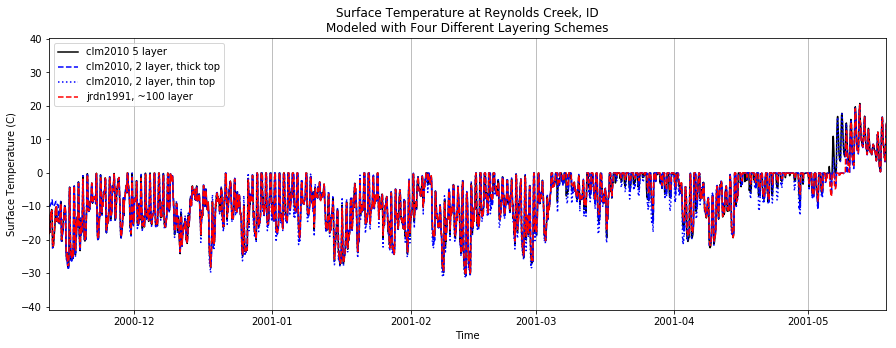

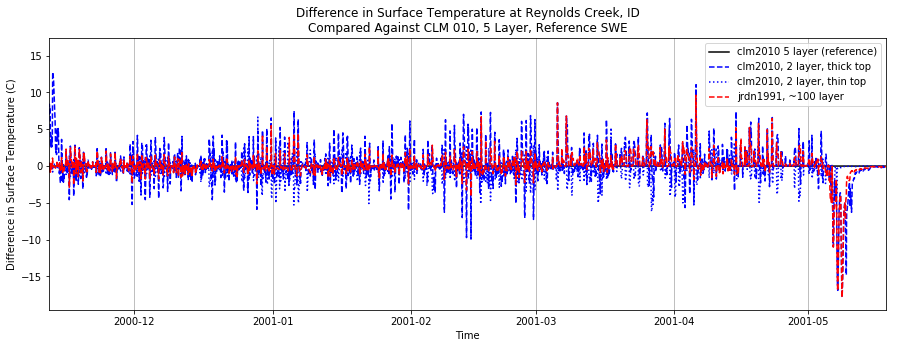

In [48]:
# Retrieve surface temperatures (convert from K to C) from each model scenario:
clm2010_5layer_Ts = ds_clm_2010.scalarSurfaceTemp.isel(hru=0) - 273.15
jrdn1991_100layer_Ts = ds_jrdn1991.scalarSurfaceTemp.isel(hru=0) - 273.15
clm2010_2layer_thick_Ts = ds_clm_2010_2thick.scalarSurfaceTemp.isel(hru=0) - 273.15
clm2010_2layer_thin_Ts = ds_clm_2010_2thin.scalarSurfaceTemp.isel(hru=0) - 273.15

# Set start and end indices for plotting different time periods
#start = 15500; end = 16500; #
start = 12000; end = 16500; #

# Plot SWE over time:
plt.figure(figsize=(15,5))
plt.title("Surface Temperature at Reynolds Creek, ID\nModeled with Four Different Layering Schemes")
plt.plot(ds_clm_2010.scalarSWE.time,clm2010_5layer_Ts,'-k',label="clm2010 5 layer")
plt.plot(ds_clm_2010_2thick.scalarSWE.time,clm2010_2layer_thick_Ts,'--b',label="clm2010, 2 layer, thick top")
plt.plot(ds_clm_2010_2thin.scalarSWE.time,clm2010_2layer_thin_Ts,':b',label="clm2010, 2 layer, thin top")
plt.plot(ds_jrdn1991.scalarSWE.time,jrdn1991_100layer_Ts,'--r',label="jrdn1991, ~100 layer")
ax = plt.gca(); ax.xaxis.grid(True)
plt.legend()
plt.xlabel("Time");
plt.ylabel("Surface Temperature (C)");
plt.xlim(((ds_clm_2010.time.data[start],ds_clm_2010.time.data[end])));

# Plot deltaSWE over time:
plt.figure(figsize=(15,5))
plt.title("Difference in Surface Temperature at Reynolds Creek, ID\nCompared Against CLM 010, 5 Layer, Reference SWE")
plt.plot(ds_clm_2010.scalarSWE.time,clm2010_5layer_Ts-clm2010_5layer_Ts,'-k',label="clm2010 5 layer (reference)")
plt.plot(ds_clm_2010_2thick.scalarSWE.time,clm2010_2layer_thick_Ts-clm2010_5layer_Ts,'--b',label="clm2010, 2 layer, thick top")
plt.plot(ds_clm_2010_2thin.scalarSWE.time,clm2010_2layer_thin_Ts-clm2010_5layer_Ts,':b',label="clm2010, 2 layer, thin top")
plt.plot(ds_jrdn1991.scalarSWE.time,jrdn1991_100layer_Ts-clm2010_5layer_Ts,'--r',label="jrdn1991, ~100 layer")
ax = plt.gca(); ax.xaxis.grid(True)
plt.legend()
plt.xlabel("Time");
plt.ylabel("Difference in Surface Temperature (C)");
plt.xlim(((ds_clm_2010.time.data[start],ds_clm_2010.time.data[end])));

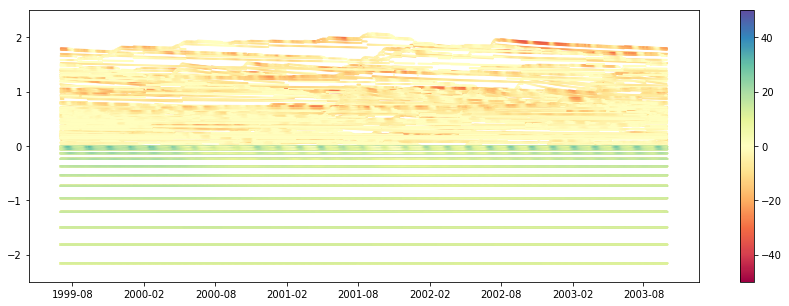

In [335]:
### Work in progress ###

# Plot SUMMA model output snow layer temperature over time

# layer temperature data in C
temp = ds_clm_2010.mLayerTemp.isel(hru=0) - 273.15
# layer midpoint height in m
height = ds_clm_2010.mLayerHeight.isel(hru=0).data
# re-shape time data to same shape as height,temp
time_array = np.array([temp.time.data,]*len(temp.midToto))

# plot height (invert y axis by plotting negative height), and temperature over time
plt.figure(figsize=(15,5))
plt.scatter(time_array,-height,s=1,c=temp,cmap='Spectral',vmin=-50,vmax=50);
plt.ylim((-2.5,2.5));
plt.colorbar();



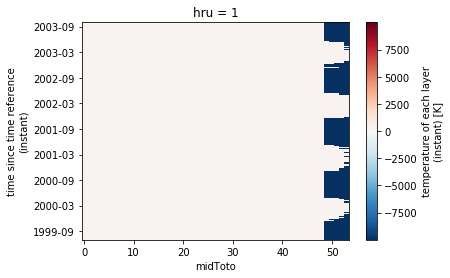

In [331]:
ds_clm_2010.mLayerTemp.isel(hru=0).plot()

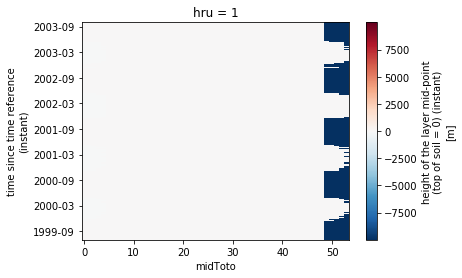

In [332]:
ds_clm_2010.mLayerHeight.isel(hru=0).plot()

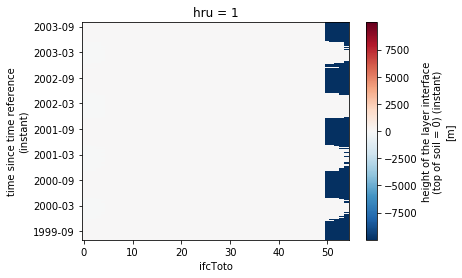

In [333]:
ds_clm_2010.iLayerHeight.isel(hru=0).plot()

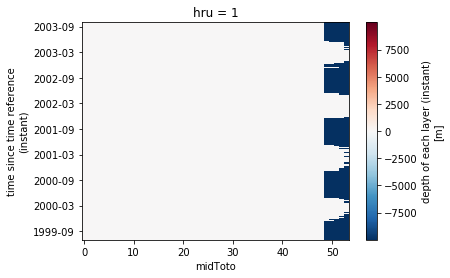

In [334]:
ds_clm_2010.mLayerDepth.isel(hru=0).plot()

***
***
## On to the next step

That's it for the first part of the first homework as far as the model simulations go. Prof. Lundquist will talk more about the analysis that you need to do on these simulations. You can do the analysis here in this notebook if python is your analysis software of choice or you can upload your output to HydroShare (in NetCDF or csv format) to do additional analysis.

Save this notebook and close the tab. You can also right-click on the file in the left panel if it has a green dot next to it and select "_Shutdown kernel_" from the popup menu to stop the python session that is executing the commands in this notebook. Then open the next notebook: 
`work/homework_1/homework_1_E_exercise_2.ipynb`.

## References

* Jordan, R., 1991: A one-dimensional temperature model for a snow cover. Technical documentation for SNTHERM.89. U.S. Army Corps of Engineers Cold Regions Research and Engineering Laboratory, 49 pp.